# **Task # 1: Data Preprocessing**

In [ ]:
# @title Libraries

import numpy as np # Linear algebra
import pandas as pd # Data processing

#Ploting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

# Random Forest - Binary Classification model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# XGBoost - Multiclass Classification model building
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

# Machine learning Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Saving and Loading the Models
import joblib
from joblib import dump
from joblib import load

# Display Images/GIF
from IPython.display import Image

#warning hadle
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")







In [ ]:
# @title  File Paths 📂:

# Specify the path to your CSV file

# Read the CSV file into a DataFrame
comp_df = pd.read_csv('/content/companies.csv')

# Explore the first 5 rows
comp_df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/5/2010,9/18/2013,5.0,17.0,initial-importer,5/25/2007 6:51,4/13/2013 3:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2/1/2003,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 2:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN


In [ ]:
# @title Summary Statistics Test
comp_df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,8618.000000,8618.000000,0.0,6485.000000,6485.00000,154.000000,154.000000,1698.000000,1.433000e+03,3904.000000,5716.000000,4995.000000,4995.000000,65.000000
mean,4308.500000,78209.474472,NaN,449.904703,202.61650,2.318182,2.097403,1.895171,2.170944e+07,1.436732,4.301435,37.845486,-52.982854,29.889623
std,2487.946643,59818.299655,NaN,577.125982,320.45991,4.575731,3.837840,1.416990,1.617558e+08,0.803906,17.469902,15.448321,69.373200,118.412612
min,0.000000,1.000000,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000e+03,1.000000,1.000000,-45.878760,-157.858333,0.518135
25%,2154.250000,12358.250000,NaN,192.000000,64.00000,1.000000,1.000000,1.000000,7.500000e+05,1.000000,1.000000,34.136420,-115.139830,2.797855
50%,4308.500000,104966.500000,NaN,262.000000,97.00000,1.000000,1.000000,1.000000,3.500000e+06,1.000000,2.000000,39.952584,-77.045146,6.492063
75%,6462.750000,139208.750000,NaN,480.000000,200.00000,2.000000,1.000000,2.000000,1.528642e+07,2.000000,4.000000,45.523062,-0.127758,19.067797
max,8617.000000,142915.000000,NaN,10800.000000,9000.00000,32.000000,29.000000,13.000000,5.700000e+09,8.000000,1189.000000,69.649205,174.776236,954.548926


In [ ]:
# @title Column Names
comp_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [ ]:
# @title Column Information
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8618 non-null   object 
 1   Unnamed: 0.1         8618 non-null   int64  
 2   entity_type          8618 non-null   object 
 3   entity_id            8618 non-null   int64  
 4   parent_id            0 non-null      float64
 5   name                 8617 non-null   object 
 6   normalized_name      8618 non-null   object 
 7   permalink            8618 non-null   object 
 8   category_code        6681 non-null   object 
 9   status               8618 non-null   object 
 10  founded_at           5453 non-null   object 
 11  closed_at            242 non-null    object 
 12  domain               6882 non-null   object 
 13  homepage_url         6882 non-null   object 
 14  twitter_username     4226 non-null   object 
 15  logo_url             6486 non-null   o

## A. Data Cleaning
    1. Delete irrelevant & redundant information.
    2. Remove noise or unreliable data (missing values).

### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at',
     'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
     'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.

### 2. Remove noise or unreliable data (missing values)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.


In [ ]:
# @title 1.a. Delete 'region', 'city', 'state_code' as they provide too much of granularity.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['region','city','state_code'], axis=1, inplace=True)

In [ ]:
# @title 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at', 'closed_at'], axis=1, inplace=True)

In [ ]:
# @title 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description',
            'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink','invested_companies'], axis=1,inplace=True)

In [ ]:
# @title 1.d. Delete duplicate values if found any

# Check for Duplicate values in dataset
comp_df.duplicated().sum()

1678

In [ ]:
# Deleting all duplicating values from dataset
comp_df = comp_df.drop_duplicates()

In [ ]:
# check if any left
comp_df.duplicated().sum()

0

In [ ]:
# @title 1.e. Delete those which has more than 98% of null values.

# missing values in decsending order
print("Dataset \n")
print("In Numbers \n\n", comp_df.isnull().sum().sort_values(ascending=True),"\n" )
print("In Percentage % \n\n", comp_df.isnull().sum()/comp_df.shape[0]*100)

Dataset 

In Numbers 

 status                    0
category_code           745
founded_at             1625
country_code           1772
relationships          1918
lat                    1963
lng                    1963
milestones             3304
last_milestone_at      3304
first_milestone_at     3304
funding_rounds         5242
last_funding_at        5265
first_funding_at       5265
funding_total_usd      5507
investment_rounds      6790
last_investment_at     6792
first_investment_at    6792
ROI                    6875
dtype: int64 

In Percentage % 

 category_code          10.734870
status                  0.000000
founded_at             23.414986
country_code           25.533141
first_investment_at    97.867435
last_investment_at     97.867435
investment_rounds      97.838617
first_funding_at       75.864553
last_funding_at        75.864553
funding_rounds         75.533141
funding_total_usd      79.351585
first_milestone_at     47.608069
last_milestone_at      47.608069
milestone

In [ ]:
# Deleting all those columns with more than 98% null values
comp_df.drop(columns=["ROI"], inplace=True)


2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [ ]:
# @title Drop instances with missing values in the specified columns

columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']
comp_df.dropna(subset=columns_to_check, inplace=True)


In [ ]:
# @title Drop the time-based columns from the DataFrame

# Define the list of time-based columns to drop because our task is not about the time series analysis
time_based_columns = ['first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']
comp_df.drop(columns=time_based_columns, inplace=True)



In [ ]:
# @title Imputing missing values using mean() method for this numerical data in dataset.

numerical_columns = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng']
for col in numerical_columns:
    comp_df[col].fillna(comp_df[col].mean(), inplace=True)

comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,USA,3.721311,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,6/27/2007,MAR,3.721311,2.038813,2.423099e+07,1.611592,2.000000,30.427755,-9.598107
6,cleantech,operating,8/20/2008,IND,3.721311,2.038813,2.423099e+07,1.611592,5.524939,22.307159,73.181219
12,advertising,operating,8/1/2008,USA,3.721311,2.038813,2.423099e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,10/1/2007,USA,3.721311,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [ ]:
# @title Re - checking for null values

comp_df.isnull().sum()

category_code        0
status               0
founded_at           0
country_code         0
investment_rounds    0
funding_rounds       0
funding_total_usd    0
milestones           0
relationships        0
lat                  0
lng                  0
dtype: int64

In [ ]:
# @title Concise summary information about the DataFrame

comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4118 entries, 0 to 8616
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_code      4118 non-null   object 
 1   status             4118 non-null   object 
 2   founded_at         4118 non-null   object 
 3   country_code       4118 non-null   object 
 4   investment_rounds  4118 non-null   float64
 5   funding_rounds     4118 non-null   float64
 6   funding_total_usd  4118 non-null   float64
 7   milestones         4118 non-null   float64
 8   relationships      4118 non-null   float64
 9   lat                4118 non-null   float64
 10  lng                4118 non-null   float64
dtypes: float64(7), object(4)
memory usage: 515.1+ KB


Now we have seen using the .info() method thet we have filled succesfully all mising the missing data.

# **Task # 2: Exploratory Data Analysis (EDA) 📊:**

    1. Univariate Analysis.
    2. Bivariate Analysis
    3. Multivariate Analysis


In [ ]:
# @title Let's check comp_df first
comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,USA,3.721311,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,6/27/2007,MAR,3.721311,2.038813,2.423099e+07,1.611592,2.000000,30.427755,-9.598107
6,cleantech,operating,8/20/2008,IND,3.721311,2.038813,2.423099e+07,1.611592,5.524939,22.307159,73.181219
12,advertising,operating,8/1/2008,USA,3.721311,2.038813,2.423099e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,10/1/2007,USA,3.721311,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


# Univariate Analysis

In [ ]:
# @title  Descriptive statistics for numerical columns in df

comp_df.describe()

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,4118.000000,4118.000000,4.118000e+03,4118.000000,4118.000000,4118.000000,4118.000000
mean,3.721311,2.038813,2.423099e+07,1.611592,5.524939,37.548424,-51.624848
std,0.836132,0.851782,9.517818e+07,0.685959,19.894670,15.594950,68.967591
min,1.000000,1.000000,2.000000e+03,1.000000,1.000000,-45.878760,-157.858333
25%,3.721311,2.038813,2.423099e+07,1.000000,2.000000,34.148972,-111.965374
50%,3.721311,2.038813,2.423099e+07,1.611592,4.000000,39.143174,-74.355289
75%,3.721311,2.038813,2.423099e+07,1.611592,5.524939,45.464204,0.121817
max,32.000000,13.000000,5.700000e+09,8.000000,1189.000000,69.649205,174.776236


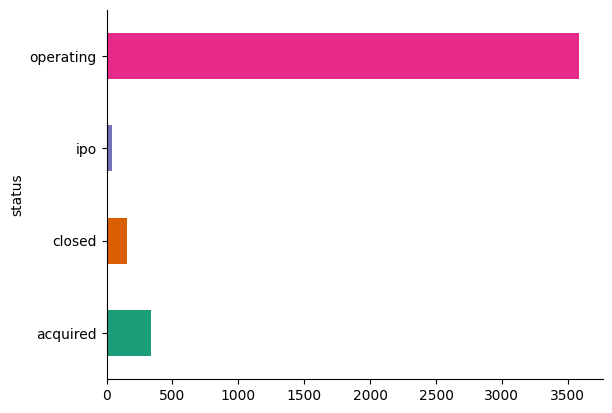

In [ ]:
# @title Visualization of Status - Column (Target Variable)

comp_df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

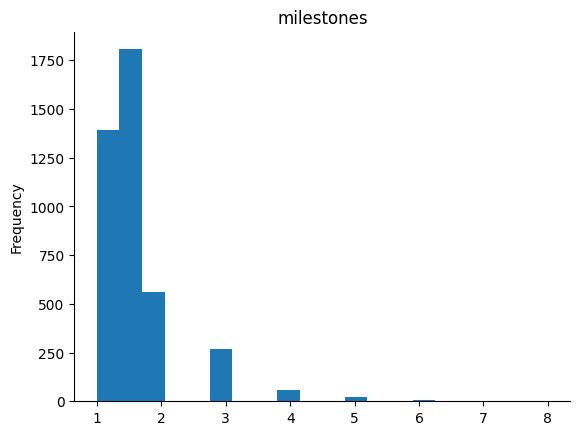

In [ ]:
# @title Visualization of Milestones - Column

comp_df['milestones'].plot(kind='hist', bins=20, title='milestones')
plt.gca().spines[['top', 'right',]].set_visible(False)

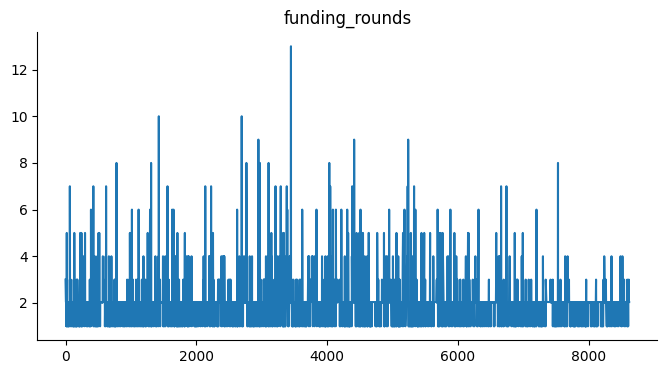

In [ ]:
# @title Visualization of Funding_rounds - Column

comp_df['funding_rounds'].plot(kind='line', figsize=(8, 4), title='funding_rounds')
plt.gca().spines[['top', 'right']].set_visible(False)

# Bivariate Analysis

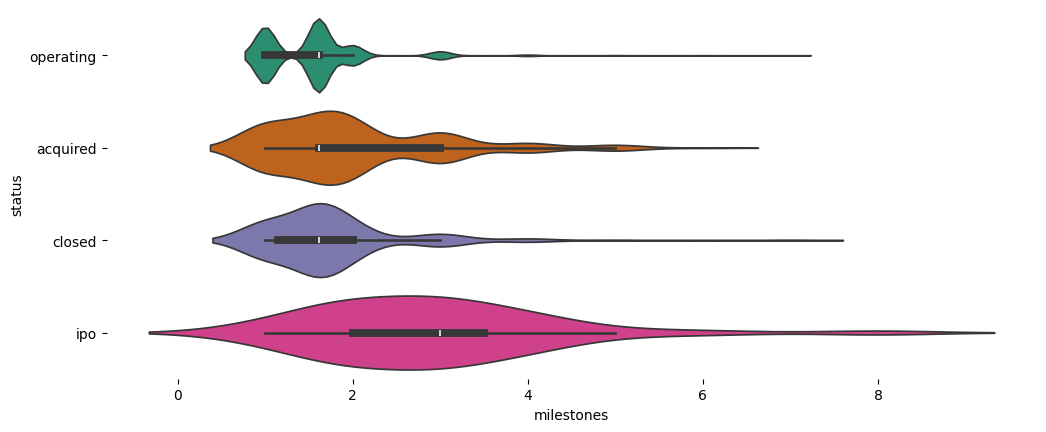

In [ ]:
# @title Visalization of Status vs Milestones

figsize = (12, 1.2 * len(comp_df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=comp_df, x='milestones', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

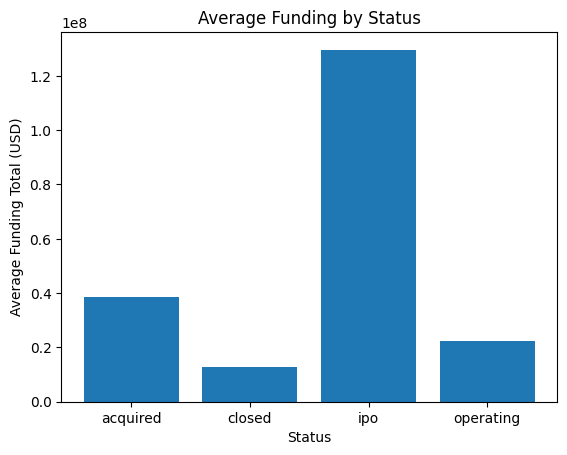

In [ ]:
# @title Visualization of Avg Funding by Status

# Group the data by status and calculate the average funding total
grouped_data = comp_df.groupby('status')['funding_total_usd'].mean()

# Create a bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Status')
plt.ylabel('Average Funding Total (USD)')
_ = plt.title('Average Funding by Status')


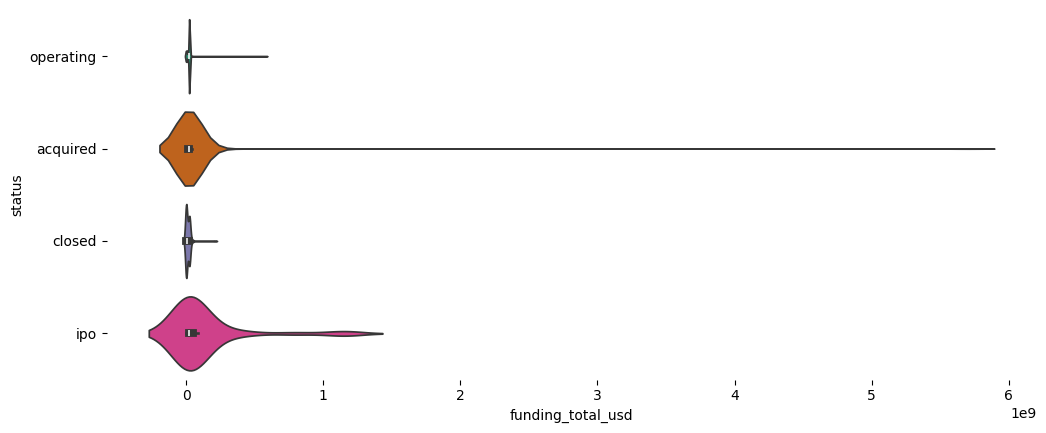

In [ ]:
# @title Visualization of Status vs Funding_total_usd

figsize = (12, 1.2 * len(comp_df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comp_df, x='funding_total_usd', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='category_code'>

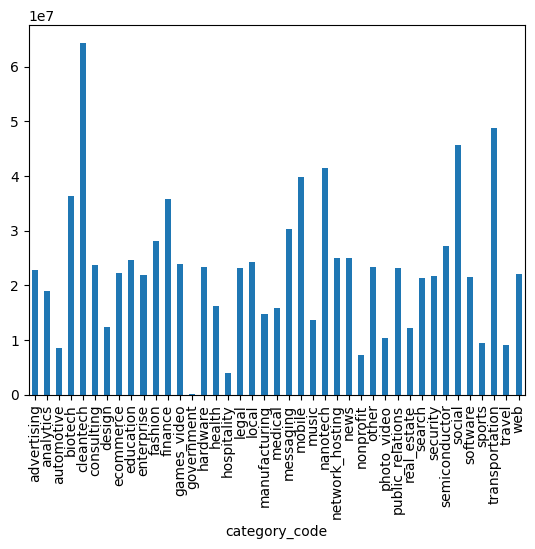

In [ ]:
# @title Visualiztion of Average_funding_amount by Category_code

comp_df.groupby('category_code')['funding_total_usd'].mean().plot(kind='bar')

# **Task # 3: Feature Engineering:**

    1. Feature Selection
    2. Creation of New Features
    3. Normalization and Scaling:
    4. Encoding Categorical Variables
    5. Feature Engineering Documentation

In [ ]:
# @title Let's check comp_df first
comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,10/17/2005,USA,3.721311,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,6/27/2007,MAR,3.721311,2.038813,2.423099e+07,1.611592,2.000000,30.427755,-9.598107
6,cleantech,operating,8/20/2008,IND,3.721311,2.038813,2.423099e+07,1.611592,5.524939,22.307159,73.181219
12,advertising,operating,8/1/2008,USA,3.721311,2.038813,2.423099e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,10/1/2007,USA,3.721311,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [ ]:
# @title Checking Rows and Columns
rows, columns = comp_df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 4118
Number of columns: 11


In [ ]:
# @title Creation of New Features from Dataset

# Convert 'founded_at' column to datetime format
comp_df['founded_at'] = pd.to_datetime(comp_df['founded_at'])

# Extract year from 'founded_at' column
comp_df['founded_at'] = comp_df['founded_at'].dt.year

comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005,USA,3.721311,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007,MAR,3.721311,2.038813,2.423099e+07,1.611592,2.000000,30.427755,-9.598107
6,cleantech,operating,2008,IND,3.721311,2.038813,2.423099e+07,1.611592,5.524939,22.307159,73.181219
12,advertising,operating,2008,USA,3.721311,2.038813,2.423099e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007,USA,3.721311,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


from matplotlib import pyplot as plt
_df_0['founded_at'].plot(kind='hist', bins=20, title='founded_at')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['funding_rounds'].plot(kind='hist', bins=20, title='funding_rounds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['funding_total_usd'].plot(kind='hist', bins=20, title='funding_total_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['milestones'].plot(kind='hist', bins=20, title='milestones')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('category_code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('country_code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='founded_at', y='funding_rounds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='funding_rounds', y='funding_total_usd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='funding_total_usd', y='milestones', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='milestones', y='relationships', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['investment_rounds']
  ys = series['founded_at']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('investment_rounds', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='category_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('investment_rounds')
_ = plt.ylabel('founded_at')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['investment_rounds']
  ys = series['founded_at']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('investment_rounds', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('status')):
  _plot_series(series, series_name, i)
  fig.legend(title='status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('investment_rounds')
_ = plt.ylabel('founded_at')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['investment_rounds']
  ys = series['founded_at']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('investment_rounds', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='country_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('investment_rounds')
_ = plt.ylabel('founded_at')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['investment_rounds']
  ys = series['funding_rounds']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('investment_rounds', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='category_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('investment_rounds')
_ = plt.ylabel('funding_rounds')

from matplotlib import pyplot as plt
_df_15['founded_at'].plot(kind='line', figsize=(8, 4), title='founded_at')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['funding_rounds'].plot(kind='line', figsize=(8, 4), title='funding_rounds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['funding_total_usd'].plot(kind='line', figsize=(8, 4), title='funding_total_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['milestones'].plot(kind='line', figsize=(8, 4), title='milestones')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['status'].value_counts()
    for x_label, grp in _df_19.groupby('category_code')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category_code')
_ = plt.ylabel('status')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['country_code'].value_counts()
    for x_label, grp in _df_20.groupby('status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('status')
_ = plt.ylabel('country_code')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['category_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='founded_at', y='category_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='founded_at', y='status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['country_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='founded_at', y='country_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['category_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='funding_rounds', y='category_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# @title Creating a dictionary to map status values to isClosed values
#status_mapping = {'operating': 1, 'ipo': 1, 'acquired': 0, 'closed': 0}

# Map status values to isClosed values and create the new column
#comp_df['isClosed'] = comp_df['status'].map(status_mapping)

# Display the updated DataFrame
#comp_df.head()


In [ ]:
# @title Normalization (Min-Max Scaling)

# Select the numerical features for normalization
numerical_features = ['investment_rounds', 'funding_rounds', 'funding_total_usd',
                      'milestones', 'relationships', 'lat', 'lng']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the selected features
comp_df[numerical_features] = scaler.fit_transform(comp_df[numerical_features])

comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005,USA,0.087784,0.166667,0.006973,0.571429,0.013468,0.809198,0.106803
5,advertising,operating,2007,MAR,0.087784,0.086568,0.004251,0.087370,0.000842,0.660503,0.445715
6,cleantech,operating,2008,IND,0.087784,0.086568,0.004251,0.087370,0.003809,0.590211,0.694575
12,advertising,operating,2008,USA,0.087784,0.086568,0.004251,0.000000,0.000842,0.706026,0.156089
13,web,acquired,2007,USA,0.087784,0.000000,0.000877,0.285714,0.010943,0.720733,0.107549


## Encoding Categorical Variables
    1. All Ordinal variables will be Label encoded - Order matter.
    2. All Nominal variables will be One Hot encoded - Order does not matter.
    

In [ ]:
# @title One-Hot Encoding - Country_Code Column

num_countries = comp_df['country_code'].nunique()
print("Number of unique countries:", num_countries)


Number of unique countries: 88


In [ ]:
# First, replace country codes not in the top 10 with 'Other'
top_countries = comp_df['country_code'].value_counts().head(10).index.tolist()
comp_df['country_code'] = comp_df['country_code'].apply(lambda x: x if x in top_countries else 'Other')

# Perform one-hot encoding for 'country_code'
comp_df = pd.get_dummies(comp_df, columns=['country_code'], prefix='country')


In [ ]:
comp_df.columns

Index(['category_code', 'status', 'founded_at', 'investment_rounds',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'lat', 'lng', 'country_AUS', 'country_CAN', 'country_DEU',
       'country_FRA', 'country_GBR', 'country_IND', 'country_IRL',
       'country_ISR', 'country_NLD', 'country_Other', 'country_USA'],
      dtype='object')

In [ ]:
# @title One-Hot Encoding - Category_Code Column

# there are only 11 unique categories in the category_code , let's apply direct one hot encode technique on
num_categories = comp_df['category_code'].nunique()
print("Number of unique categories:", num_categories)


Number of unique categories: 41


In [ ]:
# @title Keeping first 10 records

# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name

# First, replace category codes not in the top 10 with 'Other'
top_categories = comp_df['category_code'].value_counts().head(10).index.tolist()
comp_df['category_code'] = comp_df['category_code'].apply(lambda x: x if x in top_categories else 'Other')

# Perform one-hot encoding for 'category_code'
comp_df = pd.get_dummies(comp_df, columns=['category_code'], prefix='category')


In [ ]:
comp_df.columns

Index(['status', 'founded_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng',
       'country_AUS', 'country_CAN', 'country_DEU', 'country_FRA',
       'country_GBR', 'country_IND', 'country_IRL', 'country_ISR',
       'country_NLD', 'country_Other', 'country_USA', 'category_Other',
       'category_advertising', 'category_consulting', 'category_ecommerce',
       'category_enterprise', 'category_games_video', 'category_mobile',
       'category_other', 'category_public_relations', 'category_software',
       'category_web'],
      dtype='object')

In [ ]:
# @title Label Endoded - Status Column for Binary Model

# Copy the DataFrame before modifying the 'status' column
mclf_df = comp_df.copy()

# Apply the lambda function to update the 'status' column for binary classification
comp_df['status'] = comp_df['status'].apply(lambda x: 0 if (x == 'operating' or x == 'ipo') else 1 )


In [ ]:
# Check the total values in target variable

num_status = comp_df['status'].nunique()
print("Number of unique status:", num_status)

Number of unique status: 2


In [ ]:
comp_df.head()

,status,founded_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,country_AUS,...,category_advertising,category_consulting,category_ecommerce,category_enterprise,category_games_video,category_mobile,category_other,category_public_relations,category_software,category_web
0,0,2005,0.087784,0.166667,0.006973,0.571429,0.013468,0.809198,0.106803,False,...,False,False,False,False,False,False,False,False,False,True
5,0,2007,0.087784,0.086568,0.004251,0.087370,0.000842,0.660503,0.445715,False,...,True,False,False,False,False,False,False,False,False,False
6,0,2008,0.087784,0.086568,0.004251,0.087370,0.003809,0.590211,0.694575,False,...,False,False,False,False,False,False,False,False,False,False
12,0,2008,0.087784,0.086568,0.004251,0.000000,0.000842,0.706026,0.156089,False,...,True,False,False,False,False,False,False,False,False,False
13,1,2007,0.087784,0.000000,0.000877,0.285714,0.010943,0.720733,0.107549,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# @title Feature Selection using Mutual Information (MI)

# Extract the target variable (Y)
y = comp_df['status']

# Drop the target variable from the DataFrame to get the feature matrix (X)
X = comp_df.drop(columns=['status'])

# Compute mutual information between features and target
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to store feature names and their mutual information scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort features based on mutual information scores (descending order)
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the top-ranked features
print(mi_scores_df.head(10))


                      Feature  MI Score
2              funding_rounds  0.044822
27  category_public_relations  0.027556
3           funding_total_usd  0.025854
7                         lng  0.020757
6                         lat  0.019553
13                country_IND  0.018209
0                  founded_at  0.016654
29               category_web  0.014481
25            category_mobile  0.012636
9                 country_CAN  0.012623


## Summary of Feature Engineering:


After conducting comprehensive feature engineering, my dataset Comp_df has undergone significant transformations. Initially containing 11 columns consisting of 3 categorical variables and 8 numerical variables, it has now expanded to encompass 32 columns while maintaining its original 4682 rows. All variables within Comp_df have been converted to numerical format, making them suitable for analytical operations. My df is ready to embark on the next phase of model construction with confidence.



# **Task # 4 Binary Classification Model Building:**

**Assigned Model**

    1. Support vector Machines (SVM)


In [ ]:
# @title 1. Model : Implementing Decision Trees

# Split the data into feature matrix (X) and target variable (y)
X = comp_df.drop(columns=['status'])
y = comp_df['status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

#RandomForestClassifier with regularization
rf_clf_reg = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
# @title Performing Cross-Validation

# Cross-validation
cv_scores = cross_val_score(rf_clf_reg, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross-Validation Scores: [0.8801214  0.87860395 0.87405159 0.8801214  0.87537994]
Mean CV Score: 0.8776556540027951
Standard Deviation of CV Scores: 0.0024990860511119478


In [ ]:
# Fit the model to the training data
rf_clf_reg.fit(X_train, y_train)

#model's performance on the testing set
accuracy_reg = rf_clf_reg.score(X_test, y_test)
print("Accuracy on Testing Set (with Regularization):", accuracy_reg)

# Define class names
class_names = ['operating', 'not_operating']

# Get classification report with class names
print("\nClassification Report:")
print(classification_report(y_test, y_test, target_names=class_names))





Accuracy on Testing Set (with Regularization): 0.8725728155339806

Classification Report:
               precision    recall  f1-score   support

    operating       1.00      1.00      1.00       720
not_operating       1.00      1.00      1.00       104

     accuracy                           1.00       824
    macro avg       1.00      1.00      1.00       824
 weighted avg       1.00      1.00      1.00       824



# **Task # 5 Multiclass Classification Model Building:**

**Assigned Model**

    1. XGBoost


In [ ]:
# @title Let's check the df first

mclf_df.head()

,status,founded_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,country_AUS,...,category_advertising,category_consulting,category_ecommerce,category_enterprise,category_games_video,category_mobile,category_other,category_public_relations,category_software,category_web
0,operating,2005,0.087784,0.166667,0.006973,0.571429,0.013468,0.809198,0.106803,False,...,False,False,False,False,False,False,False,False,False,True
5,operating,2007,0.087784,0.086568,0.004251,0.087370,0.000842,0.660503,0.445715,False,...,True,False,False,False,False,False,False,False,False,False
6,operating,2008,0.087784,0.086568,0.004251,0.087370,0.003809,0.590211,0.694575,False,...,False,False,False,False,False,False,False,False,False,False
12,operating,2008,0.087784,0.086568,0.004251,0.000000,0.000842,0.706026,0.156089,False,...,True,False,False,False,False,False,False,False,False,False
13,acquired,2007,0.087784,0.000000,0.000877,0.285714,0.010943,0.720733,0.107549,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# @title Label Endoded for Multiclass Model

# Mapping
status_mapping = {'operating': 0, 'acquired': 1, 'closed': 2, 'ipo': 3}

# Mapping the status values to numerical values for multiclass model
mclf_df['status'] = mclf_df['status'].map(status_mapping)

In [ ]:
# Check the total values in target variable

num_status = mclf_df['status'].nunique()
print("Number of unique status:", num_status)

Number of unique status: 4


In [ ]:
# @title Feature Selection using Mutual Information (MI)

# Extract the target variable (Y)
y = mclf_df['status']

# Drop the target variable from the DataFrame to get the feature matrix (X)
X = mclf_df.drop(columns=['status'])

# Compute mutual information between features and target
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to store feature names and their mutual information scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort features based on mutual information scores (descending order)
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the top-ranked features
print(mi_scores_df.head(10))

              Feature  MI Score
2      funding_rounds  0.044628
0          founded_at  0.041606
7                 lng  0.031436
3   funding_total_usd  0.030154
19     category_Other  0.028509
4          milestones  0.028310
18        country_USA  0.028207
29       category_web  0.026509
5       relationships  0.024387
6                 lat  0.022242


In [ ]:
# @title Model: Implementation of XGBoost

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier()


In [ ]:
# @title Perform Cross Validation

cv_scores = cross_val_score(xgb_clf, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())



Cross-Validation Scores: [0.84587379 0.84587379 0.85558252 0.86998785 0.86026731]
Mean CV Score: 0.8555170522242802
Standard Deviation of CV Scores: 0.00914284857513821


In [ ]:
# @title Evaluation of Model Perfromance

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define class names
class_names = {'operating': 0, 'acquired': 1, 'closed': 2, 'ipo': 3}

# Get classification report with class names
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names = class_names))

Accuracy: 0.8495145631067961

Classification Report:
              precision    recall  f1-score   support

   operating       0.88      0.97      0.92       712
    acquired       0.29      0.08      0.13        72
      closed       0.33      0.16      0.21        32
         ipo       0.20      0.12      0.15         8

    accuracy                           0.85       824
   macro avg       0.42      0.33      0.35       824
weighted avg       0.80      0.85      0.82       824



<Figure size 4000x2000 with 0 Axes>

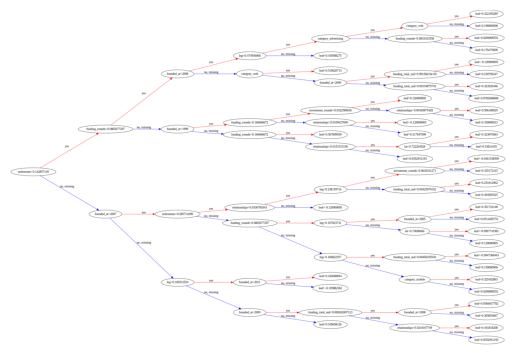

In [ ]:
# @title Visualization of XGBoost

# Plot the first tree in the ensemble
plt.figure(figsize=(40, 20))
xgb.plot_tree(xgb_clf, num_trees=0, rankdir='LR')
plt.show()

<Figure size 1000x600 with 0 Axes>

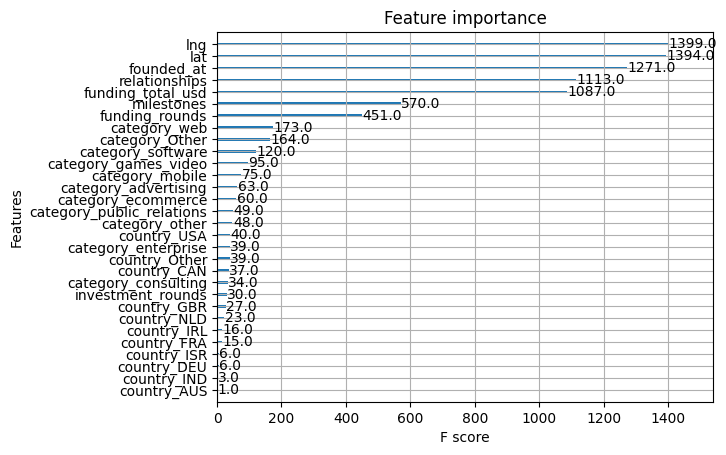

In [ ]:
# @title Plot feature importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_clf)
plt.show()

# **Task # 6 Creation of Combined Machine Learning Pipelines:**

**Steps involved:**

    1. Binary Classification Model: We have already developed a binary classification model using Random Forest.
    2. Multiclass Classification Model: Similarly, we have a multiclass classification model using a XGBoost classifier.
    3. Creating the Pipeline: Our main task is to create a pipeline that combines these two models. We'll need to ensure that the output of  
       the binary classifier is appropriately transformed before being fed into the multiclass classifier.
    4. Testing and Evaluation: Once the combined pipeline is created, we would thoroughly test it to ensure that it's functioning correctly.
       Using appropriate evaluation metrics to assess the performance of the pipeline.


In [ ]:
# @title Pre-defined the dataframes

X = comp_df.drop(columns = ['status'])
y = comp_df['status']
y_multi = mclf_df['status']
#print(y.unique())
#print(y_multi.unique())


In [ ]:
# @title Let's make classes for models

# Binary classification model
class RandomForestClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = rf_clf

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def transform(self, X):
        return X

    def predict_proba(self, X):
      return self.model.predict_proba(X)


In [ ]:
# Probability Extractor Class

class ProbaExtractor(BaseEstimator, TransformerMixin):
  def __init__(self, model):
    self.model = model

  def fit(self, X, y = None):
    return self

  def transform(self, X):
    probabilities = self.model.predict_proba(X)
    return probabilities[:, 1].reshape(-1, 1)




In [ ]:
# Muliclass Classification Model Class
class XGBClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = xgb_clf

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)


In [ ]:
# @title Splitting the data into training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_multi_train, y_multi_test = train_test_split(X, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

binary_classifier = RandomForestClassifier()
binary_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# @title Building binary and multiclass pipelines

binary_pipeline = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('dt_classifier', binary_classifier),
        ('proba_extractor', ProbaExtractor(binary_classifier))
    ]
)

multiclass_classifier = XGBClassifier()

multiclass_pipeline = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('xgb_classifier', multiclass_classifier)
    ]
)

combined_pipeline = Pipeline(
    steps=[
        ('binary_pipeline', binary_pipeline),
        ('multiclass_pipeline', multiclass_pipeline)
    ]
)

combined_pipeline.fit(X_train, y_multi_train)

Pipeline(steps=[('binary_pipeline',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('dt_classifier', RandomForestClassifier()),
                                 ('proba_extractor',
                                  ProbaExtractor(model=RandomForestClassifier()))])),
                ('multiclass_pipeline',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('xgb_classifier', XGBClassifier())]))])

In [ ]:
# @title Evaluate the performance of combined pipelines

# Make predictions using the combined pipeline
y_pred = combined_pipeline.predict(X_test)

# Evaluate the performance of the combined model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define class names
class_names = {'operating': 0, 'acquired': 1, 'closed': 2, 'ipo': 3}

# Get classification report with class names
print("\nClassification Report:")

# Generate the classification report
report = classification_report(y_multi_test, y_pred, target_names = class_names)

# Print the classification report
print(report)


Accuracy: 0.837378640776699

Classification Report:
              precision    recall  f1-score   support

   operating       0.88      0.96      0.92       717
    acquired       0.67      0.03      0.06        67
      closed       0.05      0.03      0.04        32
         ipo       0.05      0.12      0.07         8

    accuracy                           0.84       824
   macro avg       0.41      0.29      0.27       824
weighted avg       0.82      0.84      0.81       824



In [ ]:
# @title Saving models for deployement using Joblib

# Save the pipeline
joblib.dump(combined_pipeline, 'combined_pipeline.joblib')


['combined_pipeline.joblib']

In [ ]:
# @title loading models for deployment using Joblib


# Later you can load it
#loaded_pipeline = load('combined_pipeline.joblib')

# Use it for prediction
#y_pred = loaded_pipeline.predict(X_test)


